In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcdefaults()

In [90]:
imdb_basics = pd.read_csv('../Data/IMDb/title.basics.tsv.gz', sep="\t", compression="gzip", low_memory=False)
imdb_ratings = pd.read_csv('../Data/IMDb/title.ratings.tsv.gz', sep="\t", compression="gzip", low_memory=False)
movies = pd.read_csv('../Data/MovieSummaries/movie.metadata.tsv', sep="\t")

In [91]:
imdb_basics.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short"
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
9,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short"


In [92]:
imdb_ratings.head(10)

,tconst,averageRating,numVotes
0,tt0000001,5.7,2004
1,tt0000002,5.8,269
2,tt0000003,6.5,1900
3,tt0000004,5.5,178
4,tt0000005,6.2,2685
5,tt0000006,5.0,183
6,tt0000007,5.4,839
7,tt0000008,5.4,2147
8,tt0000009,5.3,207
9,tt0000010,6.9,7332


In [109]:
imdb = pd.merge(imdb_basics, imdb_ratings, on='tconst', how='left')
# convert year to datetime format
imdb['startYear'] = pd.to_datetime(imdb['startYear'], errors='coerce').dt.year
# keep only movies
imdb.query("titleType == 'movie'", inplace=True)
imdb.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894.0,\N,45,Romance,5.3,207.0
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897.0,\N,100,"Documentary,News,Sport",5.3,483.0
498,tt0000502,movie,Bohemios,Bohemios,0,1905.0,\N,100,\N,4.1,15.0
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906.0,\N,70,"Action,Adventure,Biography",6.0,854.0
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907.0,\N,90,Drama,5.0,21.0
610,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907.0,\N,\N,Drama,4.3,25.0
625,tt0000630,movie,Hamlet,Amleto,0,1908.0,\N,\N,Drama,2.9,27.0
668,tt0000675,movie,Don Quijote,Don Quijote,0,1908.0,\N,\N,Drama,4.2,20.0
672,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908.0,\N,120,"Adventure,Fantasy",5.1,68.0
828,tt0000838,movie,A Cultura do Cacau,A Cultura do Cacau,0,1909.0,\N,\N,\N,NaN,NaN


In [95]:
movies.columns = ["Wikipedia movie ID", "Freebase movie ID", "Movie name", "Movie release date", "Box office revenue", "Movie runtime", "Movie languages", "Movie countries", "Movie genres"]
# Function to extract genres from the string representation of dictionary-like data
def parse_dict(s):
    try:
        genres_dict = eval(s.replace('null', 'None'))
        return list(genres_dict.values())
    except:
        return []
# parse weird columns
movies['Movie genres'] = movies['Movie genres'].apply(parse_dict)
movies['Movie languages'] = movies['Movie languages'].apply(parse_dict)
movies['Movie countries'] = movies['Movie countries'].apply(parse_dict)

# keep only release year
movies['Movie release date'] = pd.to_datetime(movies['Movie release date'], errors='coerce').dt.year


movies.head(10)

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000.0,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
1,28463795,/m/0crgdbh,Brun bitter,NaN,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]"
2,9363483,/m/0285_cd,White Of The Eye,NaN,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri..."
3,261236,/m/01mrr1,A Woman in Flames,NaN,NaN,106.0,[German Language],[Germany],[Drama]
4,13696889,/m/03cfc81,The Gangsters,1913.0,NaN,35.0,"[Silent film, English Language]",[United States of America],"[Short Film, Silent film, Indie, Black-and-whi..."
5,18998739,/m/04jcqvw,The Sorcerer's Apprentice,NaN,NaN,86.0,[English Language],[South Africa],"[Family Film, Fantasy, Adventure, World cinema]"
6,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938.0,3600000.0,106.0,[English Language],[United States of America],"[Musical, Comedy, Black-and-white]"
7,9997961,/m/06_y2j7,Contigo y aquí,NaN,NaN,NaN,[Spanish Language],[Argentina],"[Musical, Drama, Comedy]"
8,2345652,/m/075f66,City of the Dead,NaN,NaN,76.0,[English Language],[United Kingdom],"[Horror, Supernatural]"
9,175026,/m/017n1p,Sarah and Son,NaN,NaN,86.0,[English Language],[United States of America],"[Drama, Black-and-white]"


In [110]:
print(movies.shape)
print(imdb.shape)

(81740, 9)
(661501, 11)


In [127]:
movies_imdb = pd.merge(movies, imdb, left_on=['Movie name', 'Movie release date'], right_on=['primaryTitle', 'startYear'], how='inner')
movies_imdb.drop_duplicates(subset=['primaryTitle', 'startYear'], keep='first', inplace=True)
print(movies_imdb.shape)
movies_imdb.head(20)

(26976, 20)


,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938.0,3600000.0,106.0,[English Language],[United States of America],"[Musical, Comedy, Black-and-white]",tt0029852,movie,Alexander's Ragtime Band,Alexander's Ragtime Band,0,1938.0,\N,106,"Drama,Music,Musical",6.8,2264.0
1,171005,/m/016ywb,Henry V,1989.0,10161099.0,137.0,[English Language],[United Kingdom],"[Costume drama, War film, Epic, Period piece, ...",tt0097499,movie,Henry V,Henry V,0,1989.0,\N,137,"Biography,Drama,History",7.5,31160.0
2,77856,/m/0kcn7,Mary Poppins,1964.0,102272727.0,139.0,[English Language],[United States of America],"[Children's/Family, Musical, Fantasy, Comedy, ...",tt0058331,movie,Mary Poppins,Mary Poppins,0,1964.0,\N,139,"Comedy,Family,Fantasy",7.8,181520.0
3,31983669,/m/0g4_n3m,Road to Life,1931.0,NaN,104.0,[Russian Language],[Soviet Union],[Drama],tt0022289,movie,Road to Life,Putyovka v zhizn,0,1931.0,\N,119,"Crime,Drama",6.9,456.0
4,20604092,/m/0523t_1,Anbu Thozhi,2007.0,NaN,NaN,[Tamil Language],[India],[Romance Film],tt13667080,movie,Anbu Thozhi,Anbu Thozhi,0,2007.0,\N,\N,Drama,NaN,NaN
5,156558,/m/014k4y,Baby Boy,2001.0,29381649.0,123.0,[English Language],[United States of America],"[Crime Fiction, Drama, Coming of age]",tt0255819,movie,Baby Boy,Baby Boy,0,2001.0,\N,130,"Crime,Drama,Romance",6.4,16006.0
6,11448183,/m/02rc_h4,Bindiya Chamkegi,1984.0,NaN,NaN,[Hindi Language],[India],"[Family Film, Comedy]",tt0367546,movie,Bindiya Chamkegi,Bindiya Chamkegi,0,1984.0,\N,139,"Comedy,Family",4.9,24.0
7,32445576,/m/0gyv1h1,Vinayaka Geleyara Balaga,2011.0,NaN,NaN,[],[],[],tt13906516,movie,Vinayaka Geleyara Balaga,Vinayaka Geleyara Balaga,0,2011.0,\N,\N,Drama,NaN,NaN
8,11633165,/m/02rm6l8,Innocence,NaN,NaN,110.0,[Turkish Language],[Turkey],"[Crime Fiction, Drama, Crime Drama]",tt16368148,movie,Innocence,Innocence,0,NaN,\N,\N,Drama,NaN,NaN
20,21449578,/m/05f6kpj,Hamsun,1996.0,NaN,160.0,"[English Language, Swedish Language, German La...","[Germany, Denmark, Sweden, Norway]","[War film, Drama, Political drama, World cinem...",tt0116480,movie,Hamsun,Hamsun,0,1996.0,\N,159,"Biography,Drama,War",7.2,1674.0


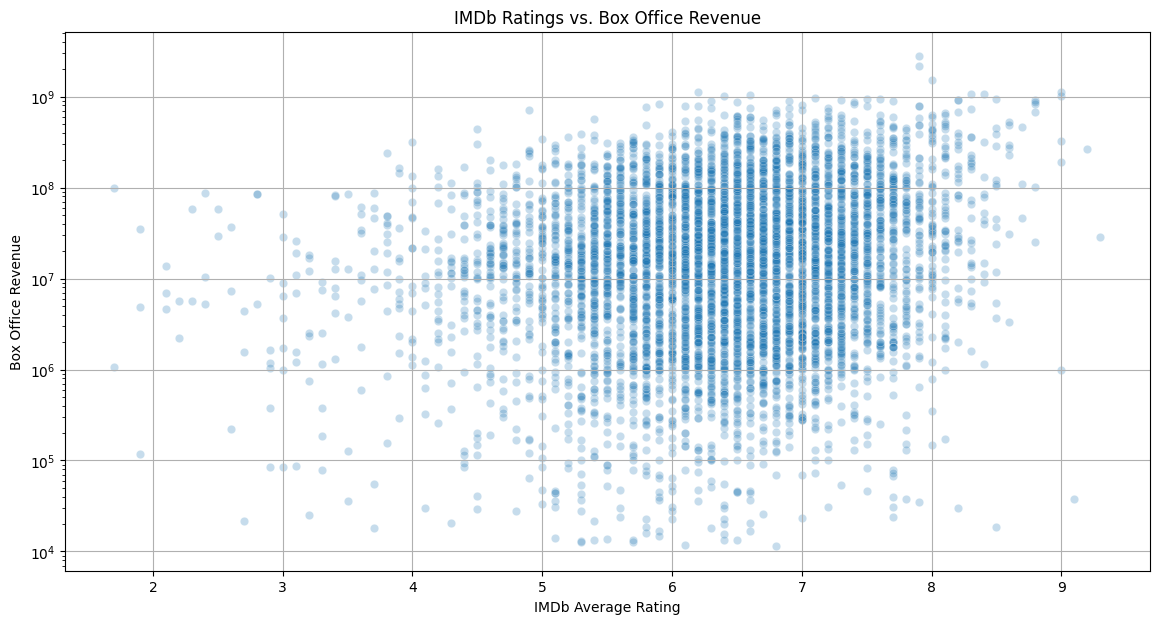

In [136]:
# Plotting ratings against box office revenue
plt.figure(figsize=(14, 7))
# Suppress seaborn warnings
import warnings
warnings.filterwarnings("ignore")

sns.scatterplot(data=movies_imdb, x='averageRating', y='Box office revenue', alpha=0.25)

plt.title('IMDb Ratings vs. Box Office Revenue')
plt.xlabel('IMDb Average Rating')
plt.ylabel('Box Office Revenue')
plt.grid(True)
plt.yscale('log')

plt.show()

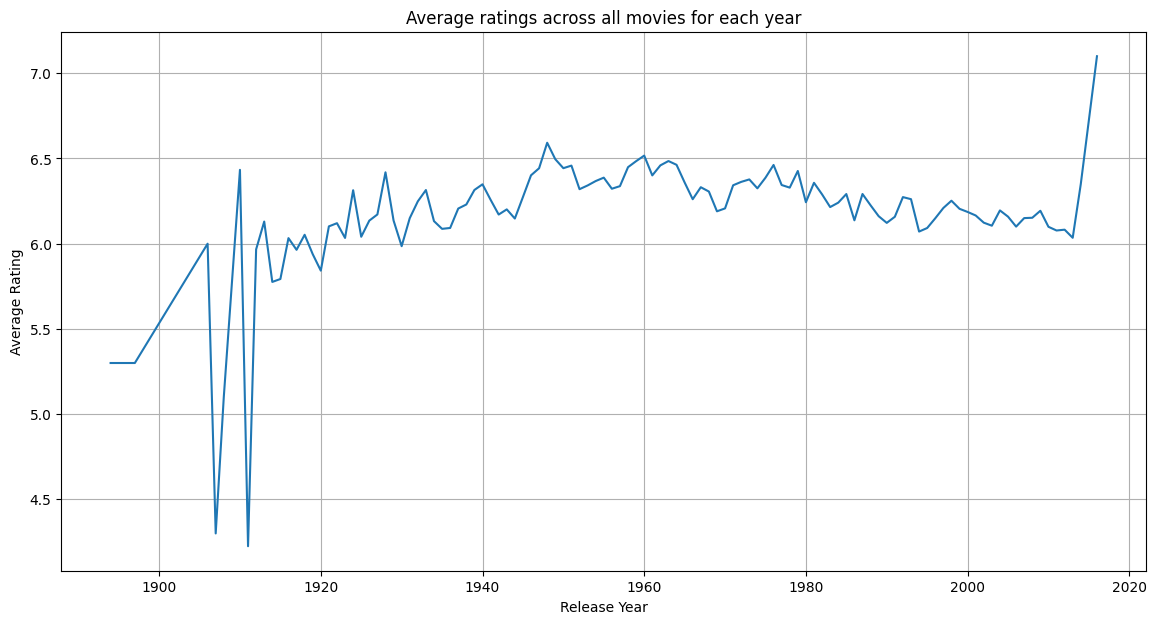

In [151]:
# Plotting ratings against box office revenue
plt.figure(figsize=(14, 7))

average_average_ratings = movies_imdb.groupby('Movie release date')['averageRating'].mean()

sns.lineplot(data=average_average_ratings)

plt.title('Average ratings across all movies for each year')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.grid(True)

plt.show()